# Εργαστηριακή Άσκηση Υπολογιστικής Νοημοσύνης
## Μέρος Α΄, Χρονολόγηση Αρχαίων Επιγραφών με Χρήση Νευρωνικών Δικτύων

Όνομα: Ζαχουλίτης Κωνσταντίνος Γεώργιος <br/>
ΑΜ: 1072578 <br/>
Έτος: 5ο <br/>
Email: up1072578@ac.upatras.gr

### Περιβάλλον Υλοποίησης 
CPU:    AMD 6-core 64-bit <br/>
OS:     Windows 11 23H2 <br/>
Python: 3.12.0 <br/>
IDE:    Pycharm Professional

### Α1. Προεπεξεργασία και Προετοιμασία δεδομένων

#### α) Κωδικοποίηση και προεπεξεργασία δεδομένων

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

df = pd.read_csv("iphi2802.csv", delimiter="\t", encoding='utf-8')


pattern = r'[.,\d\[\]-]'

# Clean the text data
for i in range(len(df)):
    sentence = (df['text'].iloc[i]).lower().split()
    for index, word in enumerate(sentence):
        clean_word = re.sub(pattern, '', word.strip())
        sentence[index] = clean_word
    clean_sent = ' '.join(sentence)
    df.loc[i, 'text'] = clean_sent


kwargs = {
    'ngram_range': (1, 1),  
    'dtype': 'int',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': 'word',  
    'min_df': 2,
    'max_df': 0.1
    #'max_features': 1000,
}


vectorizer = TfidfVectorizer(**kwargs)
X_tfidf = vectorizer.fit_transform(df['text'])
arr = X_tfidf.toarray()

df['Text_IDF'] = list(X_tfidf) #list(X_tfidf.toarray())

vocabulary = vectorizer.vocabulary_
# print(df.head(10))

c:\codeTools\Python\Lib\site-packages\sklearn\feature_extraction\text.py:2077: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int 'dtype' will be converted to np.float64.
  warnings.warn(


#### β) Κανονικοποίηση (Normalization ή min-max scaling)

In [69]:
words = set()
for i in range(len(df)):
    sent = df['text'].iloc[i].split()
    for word in sent:
        words.add(word)
print(words)
print(len(df)/len(words))

{'μηνυτης', 'τοκων', 'αριστονοω', 'συνιερομναμονων', 'χορονικου', 'αναξαγορου', 'τριακας', 'ανοικοδομησαι', 'αρχην', 'ατανιος', 'ποιωνται', 'απολλοδωρω', 'αντισθενου', 'μνησιλεω', 'ιελυσιοι', 'ναοποιοις', 'οικια', 'ευωνυμος', 'νεικηφορον', 'πολιτικη', 'δεξιου', 'σοφ', 'βιβια', 'μικιον', 'αττικος', 'λαυδικη', 'νεοκαυτων', 'ταμειω', 'συντροφος', 'ανδροσθενης', 'κλαιοστρατου', 'επιφανεστατωι', 'θεσμοφοριω', 'διεγγυησεις', 'μηβιος', 'εμα', 'ενγραψαντας', 'τετρακισμυριας', 'υοντω', 'χειλιων', 'καλατυχε', 'ευχειρος', 'αματ', 'θηκατο', 'ατταιος', 'καφυιες', 'βωροσθενειτων', 'χηνισκον', 'δωρων', 'αρετηι', 'επαραθετα', 'ιμυλωι', 'αποφ', 'ανθεμεν', 'αρισταρχου', 'προθυμομενος', 'εληται', 'πλινθων', 'ιππω', 'πασικλης', 'θηνκρατους', 'ορων', 'κομμοδος', 'κισπιος', 'κλεοπομπος', 'κρατεαν', 'θηβαιωι', 'φιλωνιδας', 'αριωνος', 'φιλελλην', 'απαντωμενης', 'νικαρχον', 'τιτελες', 'αρχιερεας', 'νεττιδα', 'σι', 'ευεργεταις', 'βαιορασπου', 'απεδοντο', 'ξαιορσαζης', 'φιλιπος', 'σγαγ', 'εμμενεω', 'ανεδεξατο', 

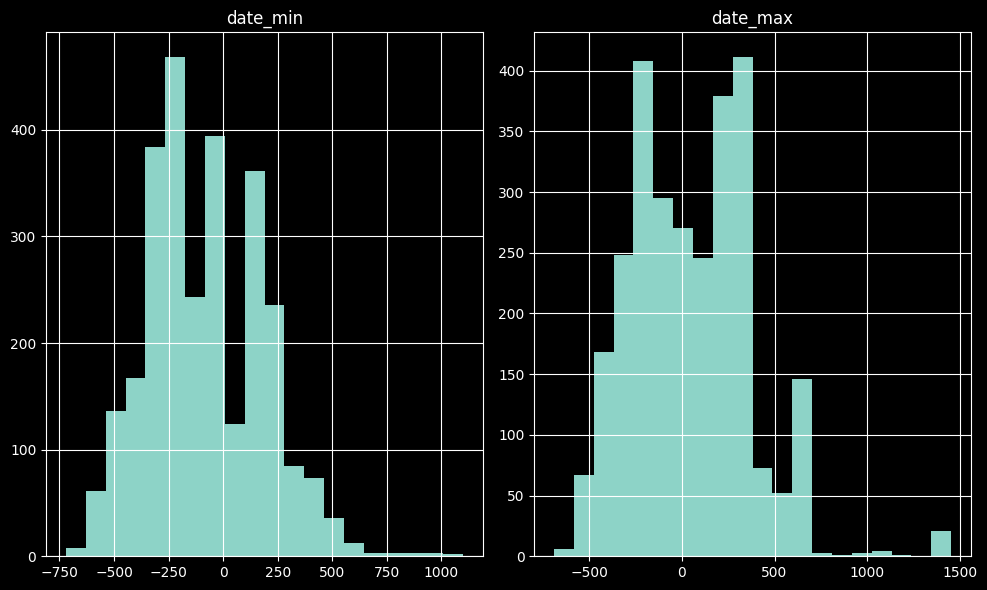

In [70]:
import matplotlib.pyplot as plt

# Plot histograms for each column
df[['Text_IDF', 'date_min', 'date_max']].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

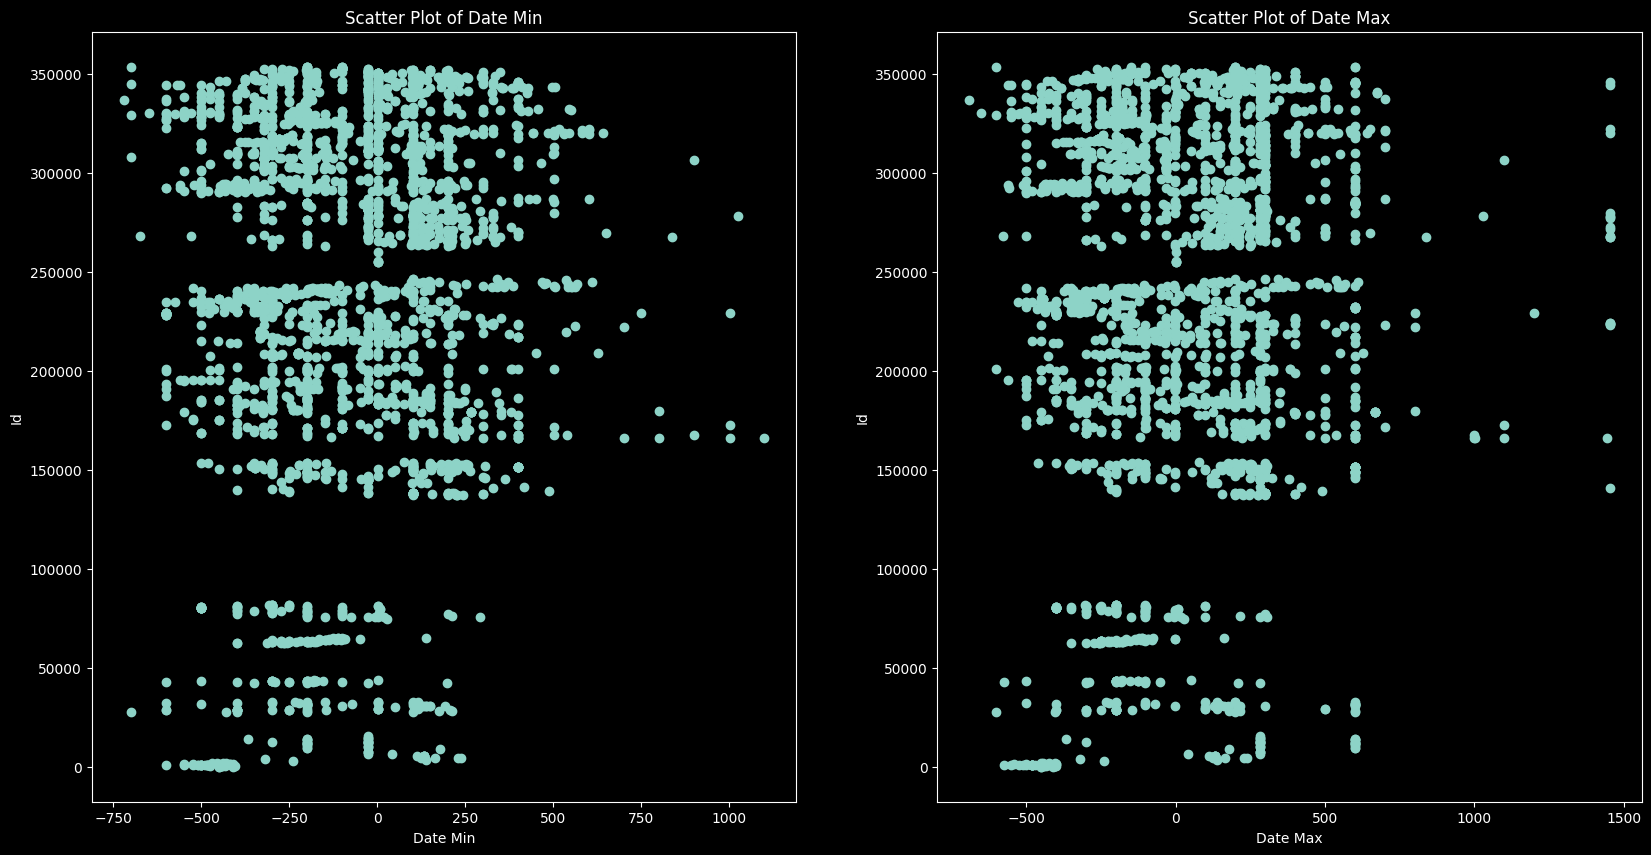

In [84]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
x_values = df['date_min']
y_values = df['id']
x_values_2 = df['date_max']
y_values_2 = df['id']

fig, axes = plt.subplots(1, 2, figsize=(20, 10))


axes[0].scatter(x_values, y_values)
axes[0].set_xlabel('Date Min')
axes[0].set_ylabel('Id')
axes[0].set_title('Scatter Plot of Date Min')

axes[1].scatter(x_values_2, y_values_2)
axes[1].set_xlabel('Date Max')
axes[1].set_ylabel('Id')
axes[1].set_title('Scatter Plot of Date Max')


# plt.tight_layout()
plt.show()

In [90]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import StandardScaler
import pandas as pd

X_text_idf = X_tfidf

# Convert the sparse matrix to a DataFrame
X_text_idf_dense = pd.DataFrame(X_text_idf.toarray(), columns=['TFIDF_' + str(i) for i in range(X_text_idf.shape[1])])

'''# Standardize the numeric features (date_min and date_max)
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[['date_min', 'date_max']])

# Concatenate the standardized numeric features with the text IDF features
norm_dataset = pd.concat([X_text_idf_dense, pd.DataFrame(X_numeric, columns=['date_min', 'date_max'])], axis=1)
'''

scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(df[['date_min', 'date_max']])

# Concatenate the standardized numeric features with the text IDF features
norm_dataset = pd.concat([X_text_idf_dense, pd.DataFrame(X_numeric, columns=['date_min', 'date_max'])], axis=1)


In [89]:
"""from sklearn.model_selection import train_test_split
import numpy as np
# Split the dataset into train and test sets
X_train, X_test = train_test_split(df[['Text_IDF','date_min','date_max']], test_size=0.2, random_state=42)

# Split the train set further into train and validation sets
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)

# Print the shape of the train, validation, and test sets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

X = df[['Text_IDF','date_min','date_max']]
zeros_array = np.zeros(len(df))
y = df['Estimated Date'] = zeros_array

# Split the dataset into train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train set further into train and validation sets for both X and y
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shape of the train, validation, and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)
"""


'from sklearn.model_selection import train_test_split\nimport numpy as np\n# Split the dataset into train and test sets\nX_train, X_test = train_test_split(df[[\'Text_IDF\',\'date_min\',\'date_max\']], test_size=0.2, random_state=42)\n\n# Split the train set further into train and validation sets\nX_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42)\n\n# Print the shape of the train, validation, and test sets\nprint("Train set shape:", X_train.shape)\nprint("Validation set shape:", X_val.shape)\nprint("Test set shape:", X_test.shape)\n\nX = df[[\'Text_IDF\',\'date_min\',\'date_max\']]\nzeros_array = np.zeros(len(df))\ny = df[\'Estimated Date\'] = zeros_array\n\n# Split the dataset into train and test sets for both X and y\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Split the train set further into train and validation sets for both X and y\nX_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_

#### γ) Διασταυρούμενη Επικύρωση (cross-validation)

In [99]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

X = df[['Text_IDF','date_min','date_max']]
zeros_array = np.zeros(len(df))
y = zeros_array
kfold = StratifiedKFold(n_splits=5, shuffle=True)

for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    #Train your model on the training data
    #model.fit(X_train, y_train)
    
    #Evaluate your model on the validation data
    #val_score = model.score(X_val, y_val)
    
    # Print the validation score for each fold
    #print(f"Validation score for fold {fold + 1}: {val_score}")

### Α2. Επιλογή αρχιτεκτονικής

#### α) Η εκπαίδευση και αξιολόγηση των μοντέλων με τη χρήση της Ρίζας του Μέσου Τετραγωνικού Σφάλματος (RMSE)


In [ ]:
print()

#### β) Συνάρτηση ενεργοποίησης για τους κρυφούς κόμβους

In [ ]:
print()

#### γ) Συνάρτηση ενεργοποίησης για τους κόμβους εξόδου

In [ ]:
print()

#### δ) Πειραματισμός με 3 διαφορετικές τιμές για τον αριθμό των νευρώνων του κρυφού επιπέδου

In [ ]:
print()

#### ε) Προσθήκη ενός έως δύο ακόμα κρυφών επιπέδων στο δίκτυο (Η2, Η3). Πειραματισμός με τον αριθμό των κόμβων

In [ ]:
print()

#### στ) Κριτήριο τερματισμού

In [ ]:
print()

### Α3. Μεταβολές στον ρυθμό εκπαίδευσης και σταθεράς ορμής

In [ ]:
print()

### Α4. Ομαλοποίηση

In [ ]:
print()

### A5. Γλωσσικά Μοντέλα (bonus)

In [ ]:
print()